<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Predicting the Age of Abalone from Physical Measurements </H1>

Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.  Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

`From the original data examples with missing values were removed (the majority having the predicted value missing), and the ranges of the continuous values have been scaled for use with an ANN (by dividing by 200).`

*Given is the attribute name, attribute type, the measurement unit and a brief description.  The number of rings is the value to predict: either as a continuous value or as a classification problem*.


The readme file contains attribute statistics.

Attribute information:

   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

Name / Data Type / Measurement Unit / Description
-------------------------------------------------------
* Sex / nominal / -- / M, F, and I (infant) 
* Length / continuous / mm / Longest shell measurement  
* Diameter	/ continuous / mm / perpendicular to length  
* Height / continuous / mm / with meat in shell  
* Whole weight / continuous / grams / whole abalone  
* Shucked weight / continuous	 / grams / weight of meat  
* Viscera weight / continuous / grams / gut weight (after bleeding)  
* Shell weight / continuous / grams / after being dried  
* Rings / integer / -- / +1.5 gives the age in years 

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/neerajprasad209/Dataset/main/abalone/abalone.data',header=None)

In [79]:
df.columns = ['Sex','Length','Diameter','Height',"Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Rings"]

In [80]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [81]:
df.shape

(4177, 9)

In [82]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='Count'>

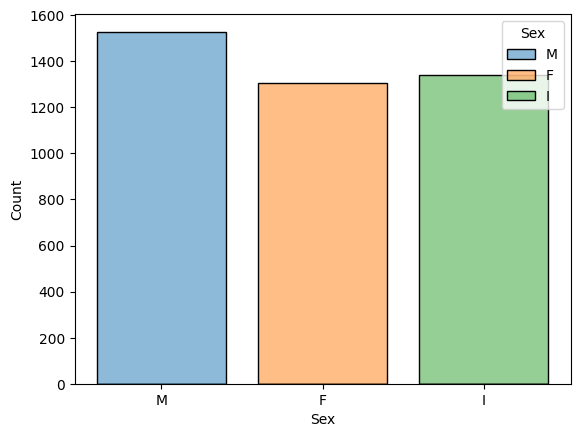

In [83]:
sns.histplot(data=df, x='Sex', hue='Sex', shrink=.8)

<Axes: ylabel='Rings'>

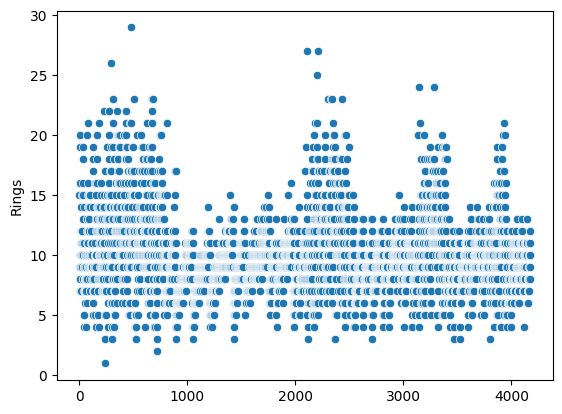

In [84]:
sns.scatterplot(data=df['Rings'])

In [85]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [86]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Seperating the Independent and Dependent Variable </H1>

In [87]:
X = df.iloc[:,:-1]

y = df.iloc[:,-1]

In [89]:
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [90]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Perfoming the Train Test Split </H1>

In [105]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest = train_test_split(X,y, test_size=0.30, random_state=42)

In [106]:
Xtrain.shape, ytrain.shape

((2923, 8), (2923,))

In [107]:
Xtest.shape, ytest.shape

((1254, 8), (1254,))

-------

In [108]:
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(exclude='number').columns

In [109]:
num_cols

Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')

In [110]:
cat_cols

Index(['Sex'], dtype='object')

<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Creating the Pipeline For Numerical and Categorical Columns </H1>

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [128]:
# Numerical Column _______________________________________________________________________________________________________________

num_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


# Categorical Column _____________________________________________________________________________________________________________

cat_pipe = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('Encoder', OrdinalEncoder())
])

In [129]:
# Preprocessing __________________________________________________________________________________________________________________

preprocessing = ColumnTransformer([
    ('numerical_pipe', num_pipe, num_cols),
    ('categorical_pipe', cat_pipe, cat_cols)
])

In [130]:
preprocessing

ColumnTransformer(transformers=[('numerical_pipe',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight'],
      dtype='object')),
                                ('categorical_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('Encoder',
                                                  OrdinalEncoder())]),
                                 Index(['Sex'], dtype='object'))])

In [131]:
scaled_xtrain = preprocessing.fit_transform(Xtrain)

In [132]:
scaled_xtest = preprocessing.transform(Xtest)

<H1 style = "font-size: 25px; 
background-color: #6b98d0; 
border-radius: 15px 50px;
padding: 10px; 
text-align: center; color: Black; 
font-family: Georgia, serif"> 
Regression Model Tranning  </H1>

In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score

In [147]:
models = {
    'Liner Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Support Vactor Regressor' : SVR(),
    'Random Forest regressor': RandomForestRegressor()
}

In [148]:
def evaluate_model(Xtrain,ytrain,Xtest,ytest, models):
    
    report = {}
    
    for i in range(len(models)):
        model = list(models.values())[i]
        # Tranning the Models
        model.fit(Xtrain,ytrain)
        
        # Predicting the Model
        ypred = model.predict(Xtest)
        
        # getting the Accuracy Score:
        model_score = r2_score(ytest,ypred)
        
        report[list(models.keys())[i]] = model_score
    
    return report        

In [149]:
evaluate_model(scaled_xtrain,ytrain,scaled_xtest,ytest, models)

{'Liner Regression': 0.5148551477004284,
 'Decision Tree Regressor': 0.14668149279655984,
 'Support Vactor Regressor': 0.5410289875601888,
 'Random Forest regressor': 0.5259596198169812}